In [4]:
from scipy.stats import norm as nr
import matplotlib.pyplot as plt
import scipy.fft as spt  
import numpy as np
from tqdm import tqdm

def invF(dt,A,xlimf='none',xlimt='none', plot='yes', output='no', absolute='yes',norm='no', positiveoutput='no'): #same as last cell but for inverse transform
    n=np.size(A)
    f=spt.fftfreq(np.size(A),d=dt)
    t=np.arange(0,np.size(A)*dt/2,dt)
    #print(f)
    #print(t)
    #print(A)
    if absolute=='no':
        if norm=='yes':
            Y0=(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y0=(spt.ifft(A))
    if absolute=='yes':
        if norm=='yes':    
            Y0=abs(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y0=abs(spt.ifft(A))
    Y=[]
    for i in range(len(Y0)//2):      #only plots the positive part of the time domain since negative part does not have physical meaning
        Y.append(Y0[i])

    if plot=='yes':
        plt.subplot(1,2,1)
        plt.plot(f,A,'.')
        if xlimf!='none':
            plt.xlim([-xlimf,xlimf])
        plt.xlabel('Frequency(hz)')
        plt.ylabel('Power')
        plt.title('Frequency Domain')
    
        plt.subplot(1,2,2)
        plt.plot(t,Y,'.')
        if xlimt!='none':
            plt.xlim([0,xlimt])
        plt.xlabel('Time(s)')
        plt.ylabel('Magnitude')
        plt.title('Time Domain')
    
    if output=='yes':
        if positiveoutput=='yes':
            return Y
        else:
            return Y0              #negative part of time domain is necessary for further transformation

        
def gendata(T,dt,noise=2,plot=True,output=True):
    n=4*int(T//dt)
    F=spt.fftfreq(n+4,d=dt)
    w=2*np.pi*F
    S=(1/w)**noise
    S[0]=S[1]
    re=[]
    im=[]
    for i in range(len(F)):
        if F[i]>=0:
            r=np.random.normal(0,1,2)
            re.append((0.5*S[i])**0.5*r[0])
    for i in range(len(re)):
        im.append(re[-i])
    y=np.concatenate([re,im])
    Mi=invF(dt,re,output='yes',absolute='no',positiveoutput='yes',plot='no')
    Ma=np.array(Mi)
    M=Ma/np.amax(abs(Ma))
    t=np.arange(0,np.size(M)*dt,dt)
    
    if plot==True:
        fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True)
        ax1.plot(F,y,'.')
        ax1.set_title('Linear')
        ax1.set_xlabel('Frequency(hz)')
        ax1.set_ylabel('sqrt Power')
        ax2.loglog(F,y,'.')
        ax2.set_xlabel('Frequency(hz)')
        ax2.set_title('Log-log')
        fig.suptitle('Sample Light Curve Frequency Space', fontsize=16)
    
        plt.figure()
        plt.plot(t,M,'.')
        plt.xlabel('Time(s)')
        plt.ylabel('Magnitude')
        plt.title('Sample Light Curve Time Space',size=16)

    if output==True:
        tr=[]
        mr=[]
        for i in range(len(t)):
            tr.append(t[i])
            mr.append(np.real(M[i]))
        return tr,mr

  0%|          | 0/25 [00:00<?, ?it/s]<ipython-input-4-fff4fd854f52>:56: RuntimeWarning: divide by zero encountered in true_divide
  S=(1/w)**noise
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
  4%|▍         | 1/25 [00:12<05:02, 12.60s/it]<ipython-input-4-fff4fd854f52>:56: RuntimeWarning: divide by zero encountered in true_divide
  S=(1/w)**noise
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
  8%|▊         | 2/25 [00:25<04:51, 12.65s/it]<ipython-input-4-fff4fd854f52>:56: RuntimeWarning: divide by zero encountered in true_divide
  S=(1/w)**noise
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
 92%|█████████▏| 23/25 [04:57<00:27, 13.80s/it]<ipython-input-4-fff4fd854f52>:56: RuntimeWarning: divide by zero encountered in true_divide
  S=(1/w)**noise
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
 96%|█████████▌| 24/25 [05:13<00:14, 14.23s/it]<ipython-input-4-fff4fd854f52>:56: RuntimeWarning: divide by zero encountered in true_divide
  S=(1/w)**noise
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
100%|██████████| 25/25 [05:27<00:00, 13.09s/it]


[0.9225693049682603, 0.8401179192047036, 0.6838703427525408, 0.7983212441541313, 0.7061518891185798, 0.8952447996441402, 0.8426488719820039, 0.9296402799541598, 0.7018657028860857, 0.8470997542053692, 0.8600142083262519, 0.8849861422778059, 0.8240970421883225, 0.8046596575895226, 0.9060596930573753, 0.8609017444689477, 0.8004355152494588, 0.817207225706912, 0.8919678848733804, 0.8881248290306146, 0.904783437500226, 0.743477876589893, 0.8729474365349281, 0.6229454659912411, 0.8677598094887972]
0.828715923109746


(0.828715923109746, (0.08067421633923667, 0.07904426617201253))

<Figure size 432x288 with 0 Axes>

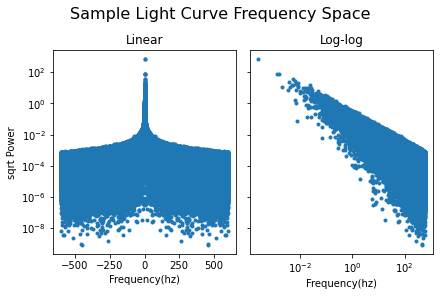

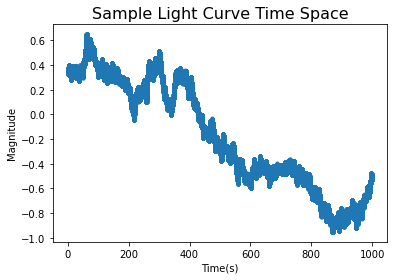

<Figure size 432x288 with 0 Axes>

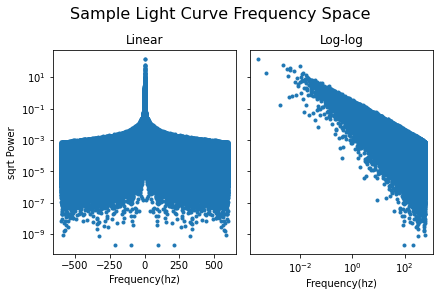

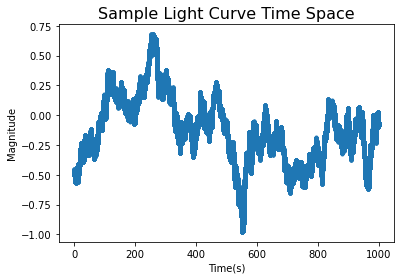

<Figure size 432x288 with 0 Axes>

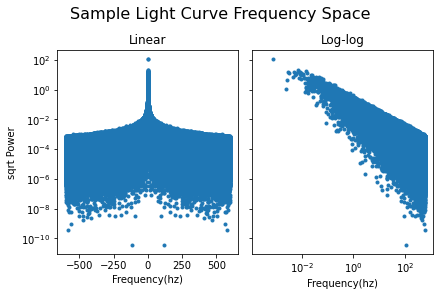

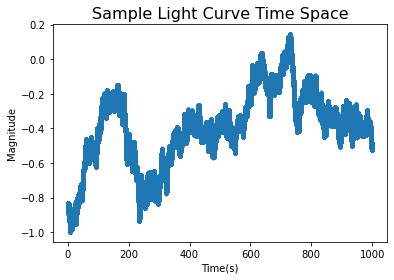

<Figure size 432x288 with 0 Axes>

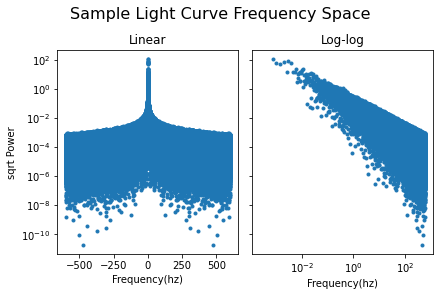

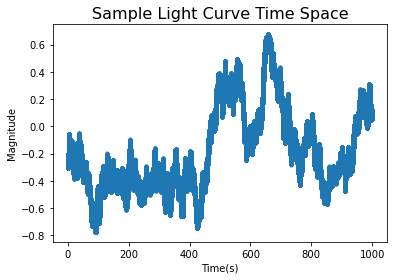

<Figure size 432x288 with 0 Axes>

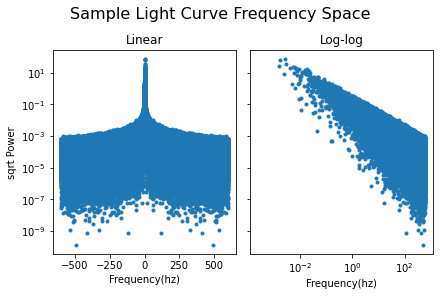

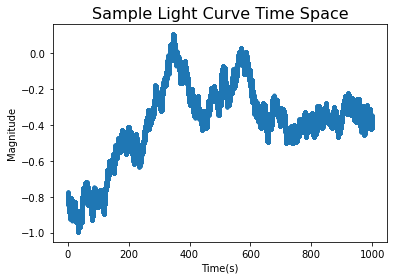

<Figure size 432x288 with 0 Axes>

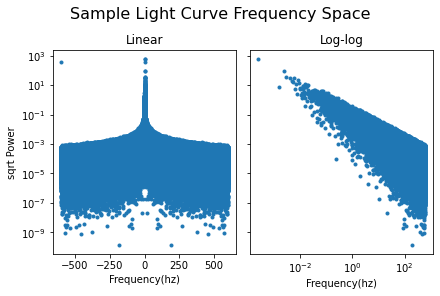

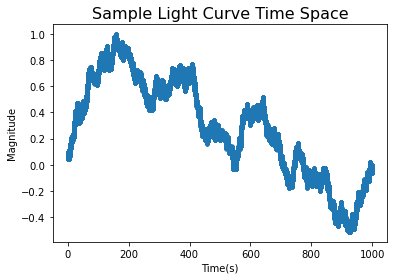

<Figure size 432x288 with 0 Axes>

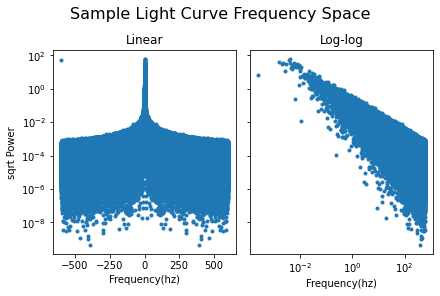

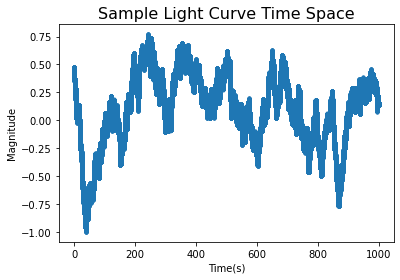

<Figure size 432x288 with 0 Axes>

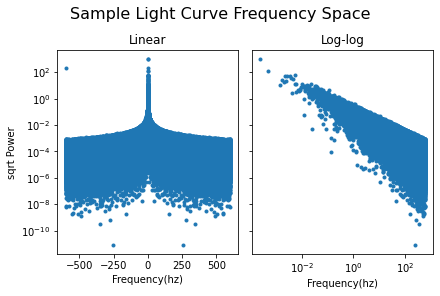

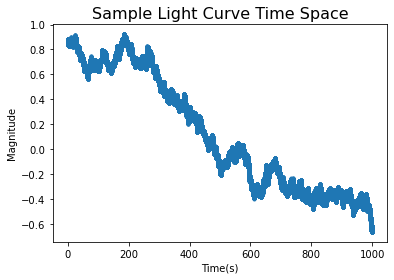

<Figure size 432x288 with 0 Axes>

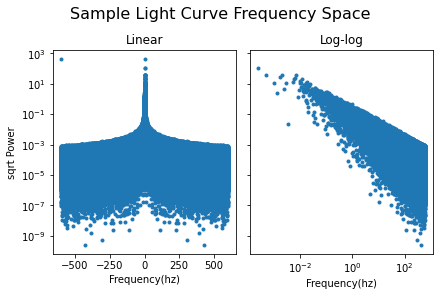

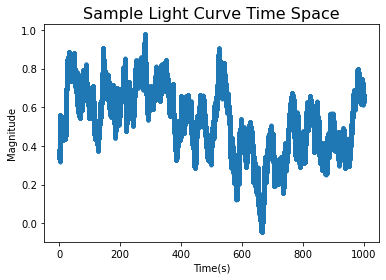

<Figure size 432x288 with 0 Axes>

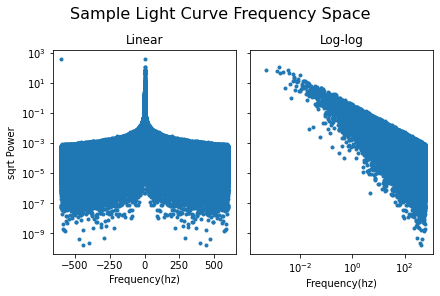

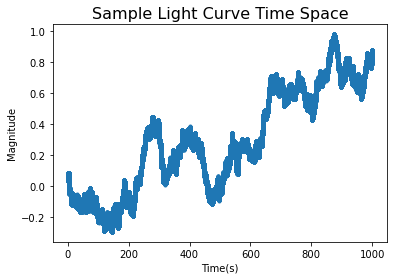

<Figure size 432x288 with 0 Axes>

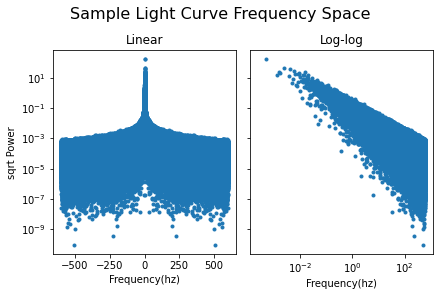

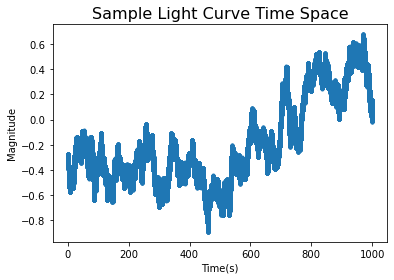

<Figure size 432x288 with 0 Axes>

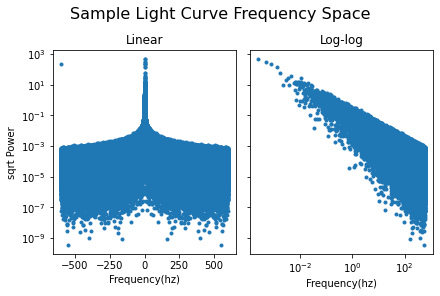

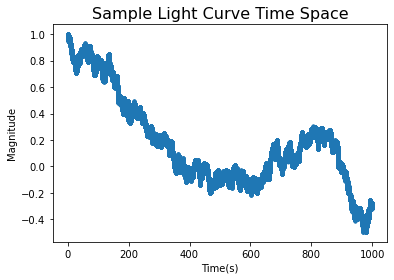

<Figure size 432x288 with 0 Axes>

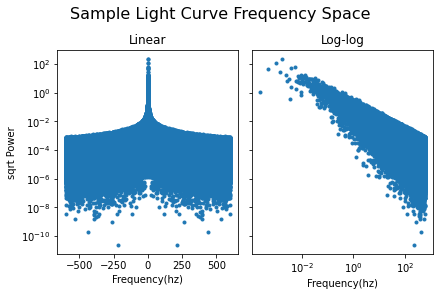

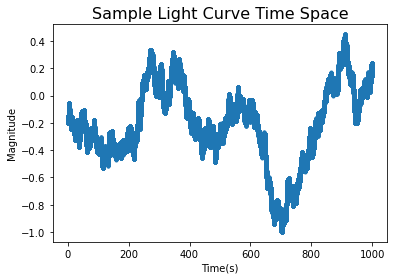

<Figure size 432x288 with 0 Axes>

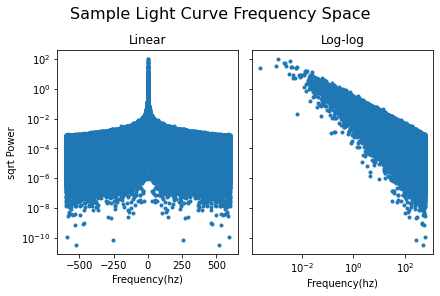

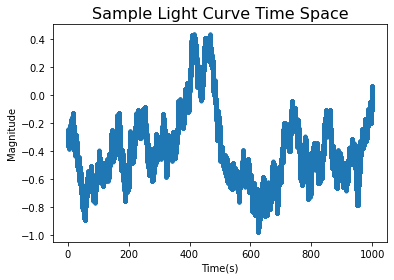

<Figure size 432x288 with 0 Axes>

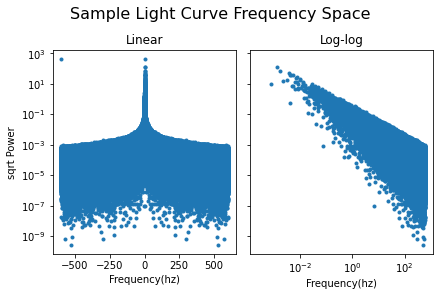

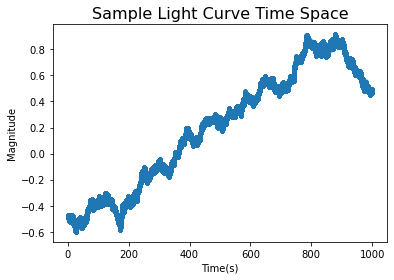

<Figure size 432x288 with 0 Axes>

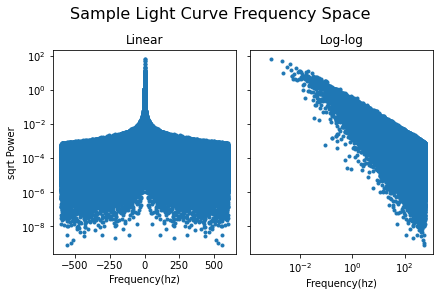

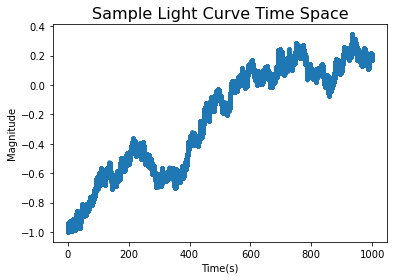

<Figure size 432x288 with 0 Axes>

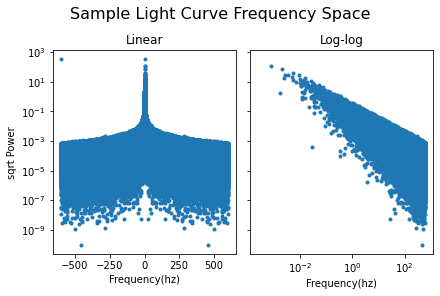

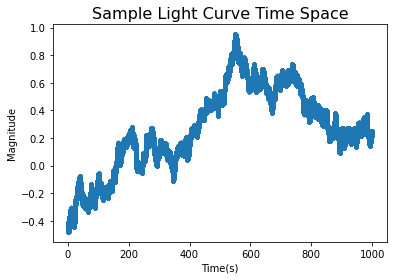

<Figure size 432x288 with 0 Axes>

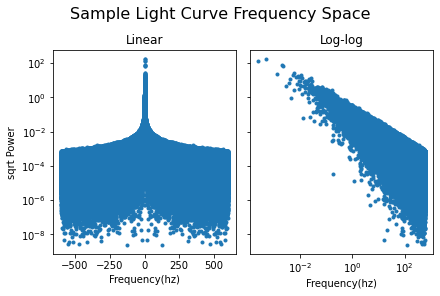

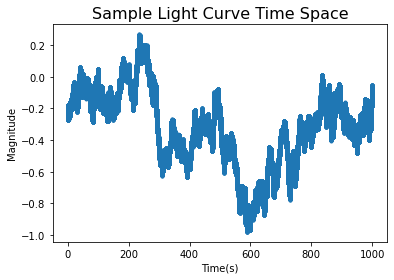

<Figure size 432x288 with 0 Axes>

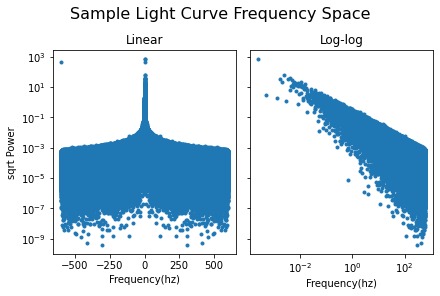

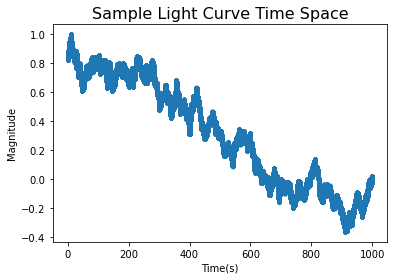

<Figure size 432x288 with 0 Axes>

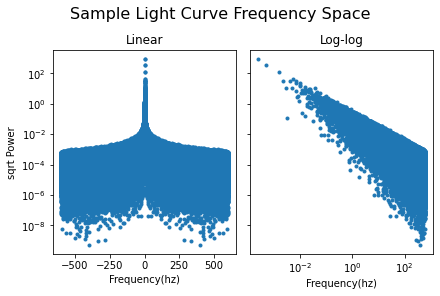

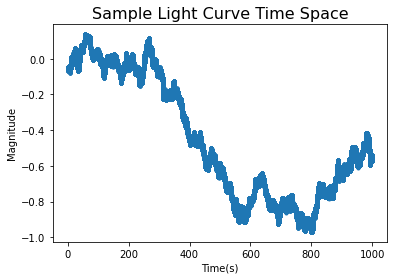

<Figure size 432x288 with 0 Axes>

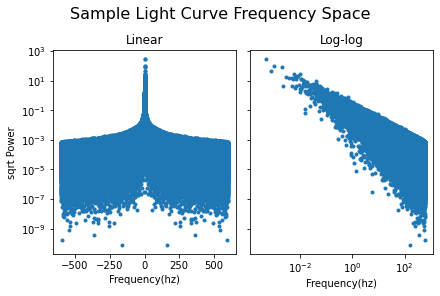

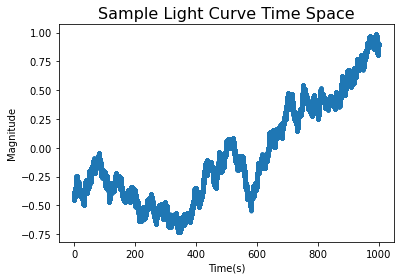

<Figure size 432x288 with 0 Axes>

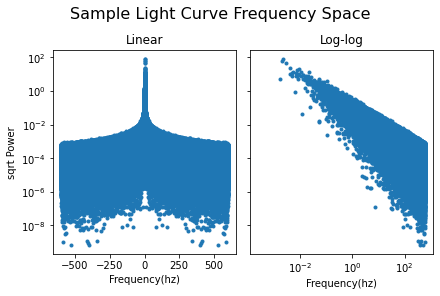

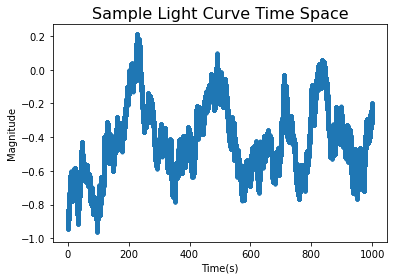

<Figure size 432x288 with 0 Axes>

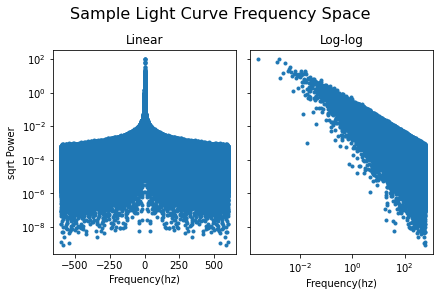

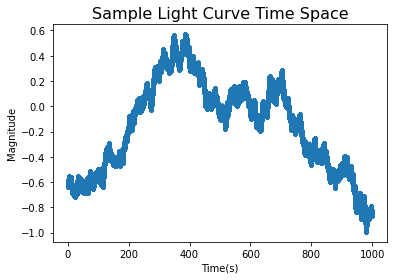

<Figure size 432x288 with 0 Axes>

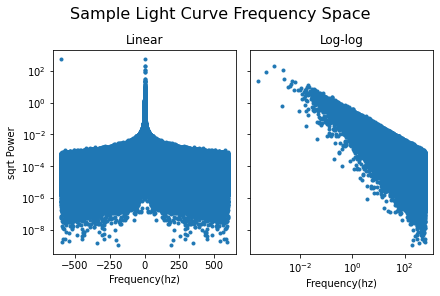

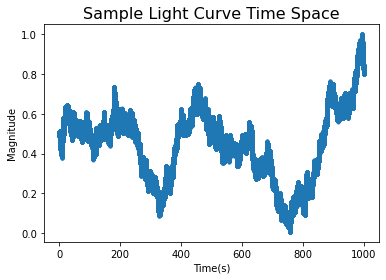

<Figure size 432x288 with 0 Axes>

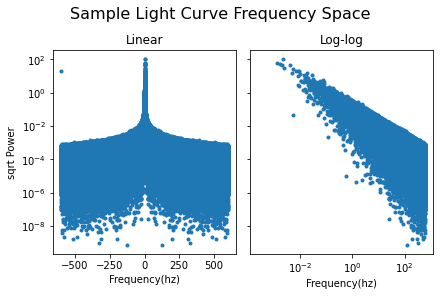

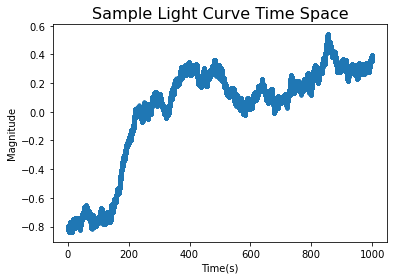

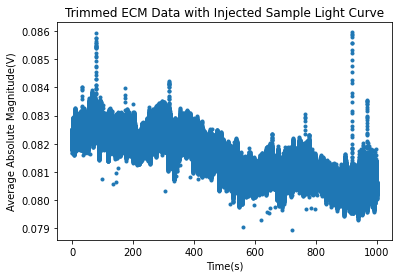

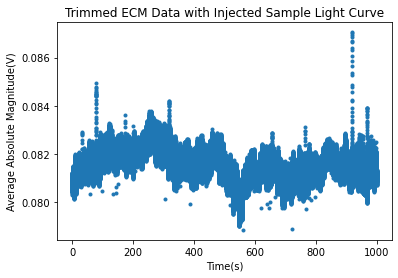

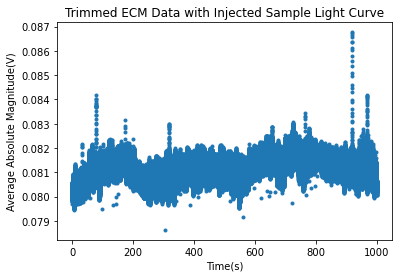

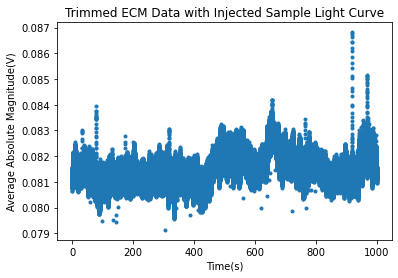

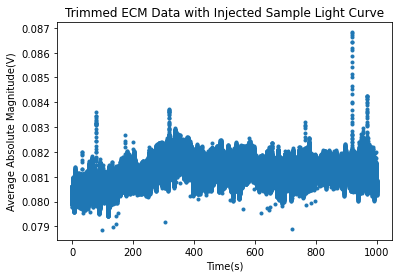

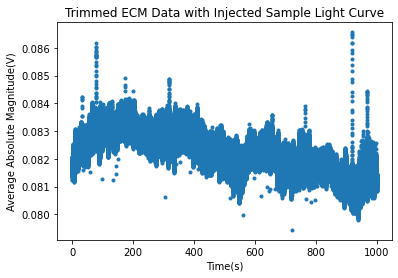

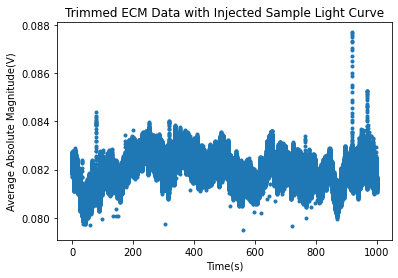

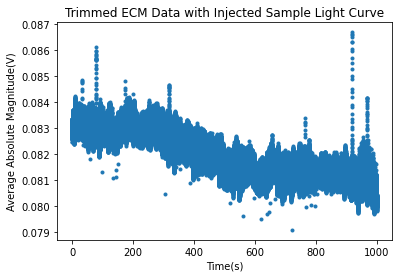

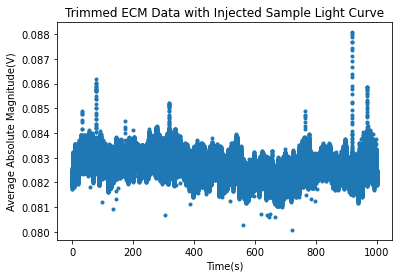

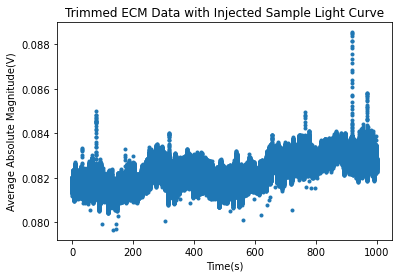

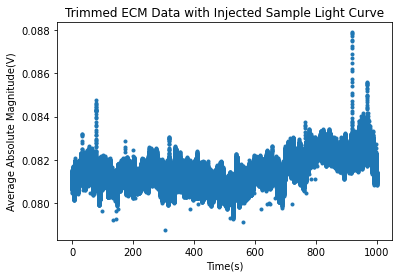

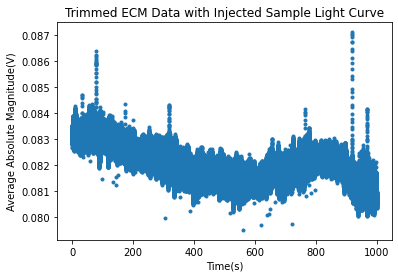

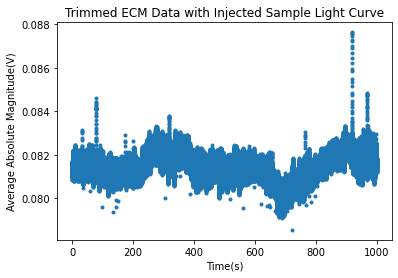

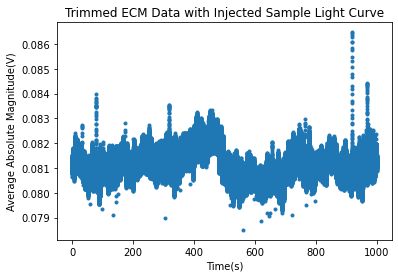

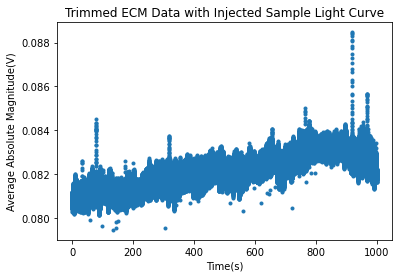

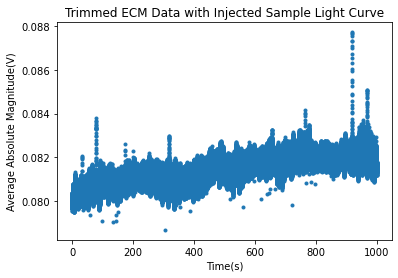

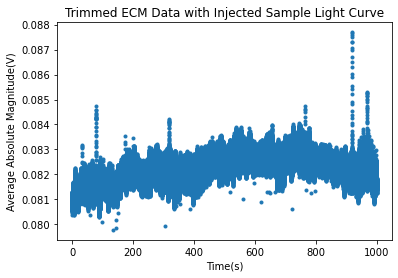

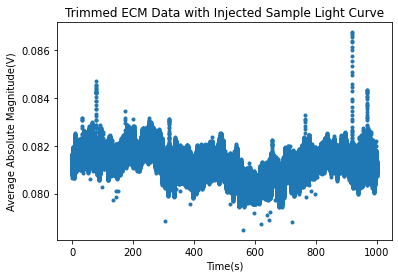

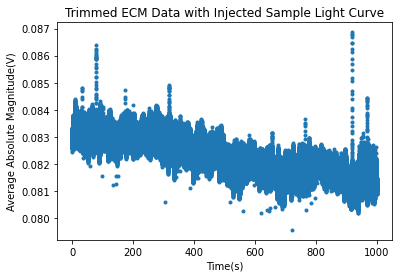

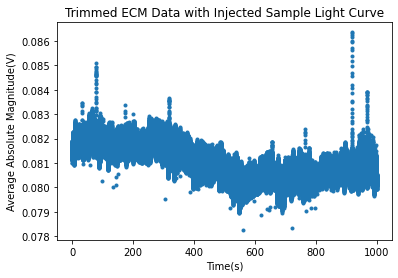

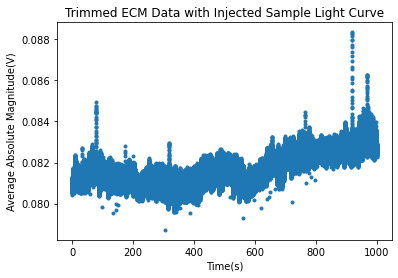

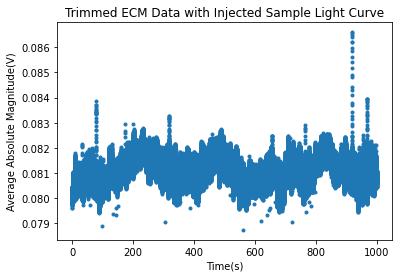

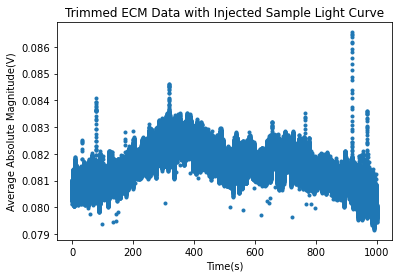

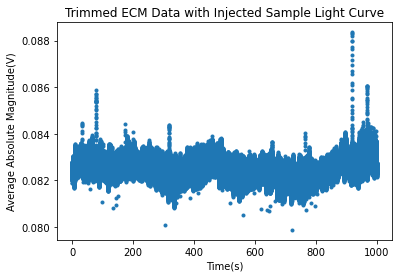

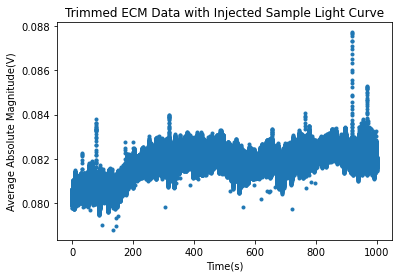

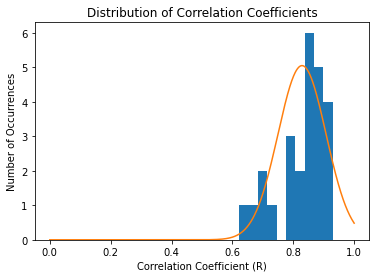

In [10]:
def getcorrelation(datafile,N,a,b,dt,strength=1,plot1=False,plot2=False,showrs=False,printoutput=False,histogram=False):
    data=np.genfromtxt(datafile, delimiter=',')
    tdata=[]
    mdata=[]
    for i in data:
        tdata.append(i[0])
        mdata.append(abs(i[1]))
    T=b-a
    ttdata0=[]
    mmdata=[]
    for i in range(len(tdata)):
        if tdata[i]>a and tdata[i]<=b:
            ttdata0.append(tdata[i])
            mmdata.append(mdata[i])
    ttdata=[]
    for i in range(len(ttdata0)):
        ttdata.append(ttdata0[i]-ttdata0[0])
    norm=np.array(mmdata)-(np.sum(mmdata)/np.size(mmdata))
    rms=(np.sum(np.array(norm)**2)/np.size(norm))**0.5  
    
    curves=[]
    for i in tqdm(range(N)):
        if plot1==True:
            plt.figure()
            curve=gendata(T,dt,plot=True)
        else:
            curve=gendata(T,dt,plot=False)
        curves.append(curve[1])  
    injecteds=[]
    for i in curves:
        yinjected=[]
        for j in range(len(mmdata)):
            yinjected.append(abs(mmdata[j]+strength*rms*i[j]))
        if plot2==True:
            plt.figure()
            plt.plot(ttdata,yinjected,'.')
            plt.title('Trimmed ECM Data with Injected Sample Light Curve')
            plt.xlabel('Time(s)')
            plt.ylabel('Average Absolute Magnitude(V)')  
        injecteds.append(yinjected)
    rs=[]
    for i in range(len(injecteds)):
        corr_matrix = np.corrcoef(curves[i], injecteds[i])
        corr = corr_matrix[0,1]
        rs.append(corr)
    mu=np.mean(rs)
    sigma=np.std(rs,ddof=1)
    def gaussian(x,sigma,mu):
        p=(1/(sigma*(2*np.pi)**0.5))*np.e**(-1*((x-mu)**2)/(2*sigma**2))
        return p
    (gmu,gsigma)=nr.fit(rs)
    Rrange=np.linspace(0,1,1000)
    yR=[]
    for i in Rrange:
        yR.append(gaussian(i,gsigma,gmu))
    
    if showrs==True:
        print(rs)
    rmean=np.sum(rs)/N
    if printoutput==True:
        print(rmean)
    if histogram==True:
        plt.figure()
        t = plt.hist(rs, 10,)
        plt.title('Distribution of Correlation Coefficients')
        plt.xlabel('Correlation Coefficient (R)')
        plt.ylabel('Number of Occurrences')
        plt.plot(Rrange,yR)
        
    
    
    
    return rmean, (sigma,gsigma)

    
    
    
getcorrelation('20220104-FRB180814.J422+73-T1.csv',25,250,1250,1/1200,strength=5,plot1=True,plot2=True,showrs=True,printoutput=True,histogram=True)

In [ ]:
x=np.linspace(0,20,100)
strengths=list(x)
r=[]
for i in tqdm(strengths):
    r.append(getcorrelation('20220104-FRB180814.J422+73-T1.csv',4,250,1250,1/1200,strength=i))
plt.plot(strengths,r,'.')
plt.title('Strength of Correlation at Different Strengths of Injected Signal')
plt.xlabel('Relative Strength of Injected Signal')
plt.ylabel('Average Correlation Coefficient (4 Trials)')  

In [7]:
print(mu,sigma)

NameError: name 'mu' is not defined